# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Jwike Adelia Br Sidabariba
- **Email:** jwikeadelia554@gmail.com
- **ID Dicoding:** jwikeadeliasdb

## Menentukan Pertanyaan Bisnis

- Bagaimana performa penyewaan sepeda dalam beberapa bulan terakhir?
- Kapan waktu penyewaan sepeda paling tinggi terjadi?
- Pada musim apa penyewaan sepeda paling tinggi?
- Kapan terakhir kali penyewa melakukan transaksi?
- Seberapa sering seorang penyewa melakukan transaksi penyewaan dalam beberapa bulan terakhir?
- Berapa banyak total sepeda yang disewa oleh pengguna (total rental)?




## Import Semua Packages/Library yang Digunakan

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

**Tujuan**

Proses ini memiliki tujuan antara lain

*   mengumpulkan seluruh data yang dibutuhkan;
*   menilai kualitas dari data yang telah dikumpulkan; dan
*   membersihkan data tersebut sehingga siap untuk dianalisis.





### Gathering Data

Pada tahap Gathering Data, kita menggunakan pd.read_csv() karena data kita tipe data csv.

*   **Load tabel day**

Data pertama yang harus kita muat ialah data dari tabel day.

In [4]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


*   **Load tabel hour**

Data selanjutnya yang harus kita muat ialah data dari tabel hour.

In [5]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Oke, sekarang kita telah berhasil memuat semua data yang dibutuhkan. Tahap selanjutnya ialah menilai kualitas dari data tersebut.

### Assessing Data

Sebelum kita mengalisis data, kita harus memeriksa data untuk memastikan data berkualitas.

**Menilai Data day_df**

Sebagai permulaan, kita memeriksa tipe data data dari tiap kolom yang terdapat dalam day_df

In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Jika Anda perhatikan, jumlah data pada day_df telah lengkap atau dengan kata lain tidak ada missing value di dalamnya. Akan tetapi, terdapat kesalahan tipe data untuk kolom dteday

Untuk memastikan keraguan, kita dapat mengecek ulang jumlah missing value, dan dapat dilihat bahwa tidak ada missing value pada dataset

In [7]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [8]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [9]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Berdasarkan pemeriksaan diatas, tidak ada duplikasi data ataupun inaccurate value

**Menilai Data hour_df**

Selanjutnya kita akan menilai data pada hour_df

In [10]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


  Jika Anda perhatikan, jumlah data pada hour_df telah lengkap atau dengan kata lain tidak ada missing value di dalamnya. Akan tetapi sama seperti data day_df, terdapat kesalahan tipe data untuk kolom dteday

Anda dapat melakukan pengecekan ulang missing value

In [11]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [12]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [13]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


  Berdasarkan pemeriksaan diatas, tidak ada duplikasi data ataupun inaccurate value

Oke, sampai tahap ini, kita telah berhasil mengidentifikasi berbagai masalah pada data yang telah kita kumpulkan. Berikut merupakan rangkumannya.



*   Terdapat kesalahan tipe data untuk kolom dteday pada data day_df
*   Terdapat kesalahan tipe data untuk kolom dteday pada data hour_data



### Cleaning Data

*   **Membersihkan Data day_df**

Untuk mengatasi masalah ini, kita akan mengganti tipe data pada kolom dteday menjadi datetime



In [14]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

Untuk memastikan hal ini berjalan sesuai harapan, periksa kembali tipe data tersebut

In [15]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

*   **Membersihkan Data hour_df**

Sama seperti tabel day_df, kita akan mengganti tipe data pada kolom dteday menjadi datetime

In [16]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

Periksa kembali tipe data tersebut

In [17]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Itulah segenap proses data wrangling untuk menyiapkan data sebelum dianalisis. Selanjutnya kita akan masuk pada tahap Exploratory Data Analysis.

## Exploratory Data Analysis (EDA)

**Tujuan**

Proses ini memiliki tujuan

*   melakukan eksplorasi terhadap setiap data untuk mencari insight menarik guna menjawab pertanyaan bisnis yang ada.



### Explore ...

**Eksplorasi Data hour_df**

Eksplorasi data diawali dengan data hour_df. Pertama, kita lihat deskriptif statistik data tersebut

In [18]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Dapat dilihat bahwa data tampak normal.

Kemudian kita mencari, pada jam berapa transaksi penyewaan banyak terjadi. Dapat kita lihat, bahwa jam 17.00 paling banyak terjadi transaksi penyewaan.

In [19]:
hour_df.groupby(by="hr").cnt.nunique().sort_values(ascending=False)

,cnt
hr,
17,494
18,471
8,467
19,423
16,414
14,385
12,383
15,383
13,377


Berdasaran data tersebut, kita juga dapat mencari total apa transaksi yang terjadi.

In [20]:
rentals_by_day_hour = hour_df.groupby(['weekday', 'hr'])['cnt'].sum().reset_index()


peak_rentals = rentals_by_day_hour['cnt'].max()
peak_day_hour = rentals_by_day_hour[rentals_by_day_hour['cnt'] == peak_rentals]


day_map = ['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu']
peak_day = day_map[peak_day_hour['weekday'].values[0]]
peak_hour = peak_day_hour['hr'].values[0]
print("Hari dengan transaksi sewa tinggi: ", peak_day)
print("Jam: ", peak_hour)
print("Total:", peak_rentals)

Hari dengan transaksi sewa tinggi:  Selasa
Jam:  17
Total: 56605


**Eksplorasi Data day_df**

Selanjutnya, kita akan mengeksplorasi data day_df. Sebagai permulaan, kita akan melihat rangkuman parameter statistik dari data day_df

In [21]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Dari data di atas, kita akan melihat bagaimana performa penyewaan yang telah terjadi

In [22]:
daily_orders_df = day_df.resample(rule='D', on='dteday').agg({
        "instant": "nunique",
        "cnt": "sum"
    })

daily_orders_df = daily_orders_df.reset_index()

print(daily_orders_df)

        dteday  instant   cnt
0   2011-01-01        1   985
1   2011-01-02        1   801
2   2011-01-03        1  1349
3   2011-01-04        1  1562
4   2011-01-05        1  1600
..         ...      ...   ...
726 2012-12-27        1  2114
727 2012-12-28        1  3095
728 2012-12-29        1  1341
729 2012-12-30        1  1796
730 2012-12-31        1  2729

[731 rows x 3 columns]


**Eksplorasi data day_df dan hour_df**

Kemudian kita akan mengeksplorasi data day_df dan hour_df. Jika kita melihat pada kedua data tersebut, day_df dan hour_df mereka memiliki kolom yang sama, kecuali kolom 'hr' yang tidak tersedia di data day_df.

Kali ini kita akan menggabungkan kedua data berdasarkan dteday, dan mencari musim mana yg paling tinggi terjadi penyewaan

In [23]:
season_rental_day = day_df.groupby('season')['cnt'].sum().reset_index()

hour_df['date'] = hour_df['dteday'].dt.date
daily_rentals_hour = hour_df.groupby('date')['cnt'].sum().reset_index()
daily_rentals_hour['dteday'] = pd.to_datetime(daily_rentals_hour['date'])
daily_rentals_hour = daily_rentals_hour.merge(day_df[['dteday', 'season']], on='dteday', how='left')
season_rental_hour = daily_rentals_hour.groupby('season')['cnt'].sum().reset_index()

season_rental_total = pd.merge(season_rental_day, season_rental_hour, on='season', suffixes=('_day', '_hour'))
season_rental_total['total_rentals'] = season_rental_total['cnt_day'] + season_rental_total['cnt_hour']

season_rental_total['season'] = season_rental_total['season'].replace({
    1: 'spring',
    2: 'summer',
    3: 'fall',
    4: 'winter'
})

season_rental_total = season_rental_total.sort_values(by='total_rentals', ascending=False)

print(season_rental_total)


   season  cnt_day  cnt_hour  total_rentals
2    fall  1061129   1061129        2122258
1  summer   918589    918589        1837178
3  winter   841613    841613        1683226
0  spring   471348    471348         942696


Dapat dilihat bahwa diantara keempat musim tersebut, musim fall memiliki banyak transaksi sewa

## Visualization & Explanatory Analysis

Nah, langkah selanjutnya adalah membuat visualisasi data dan explanatory analysis guna menjawab berbagai pertanyaan yang ada

### Pertanyaan 1:
**Bagaimana performa penyewaan sepeda dalam beberapa bulan terakhir?**

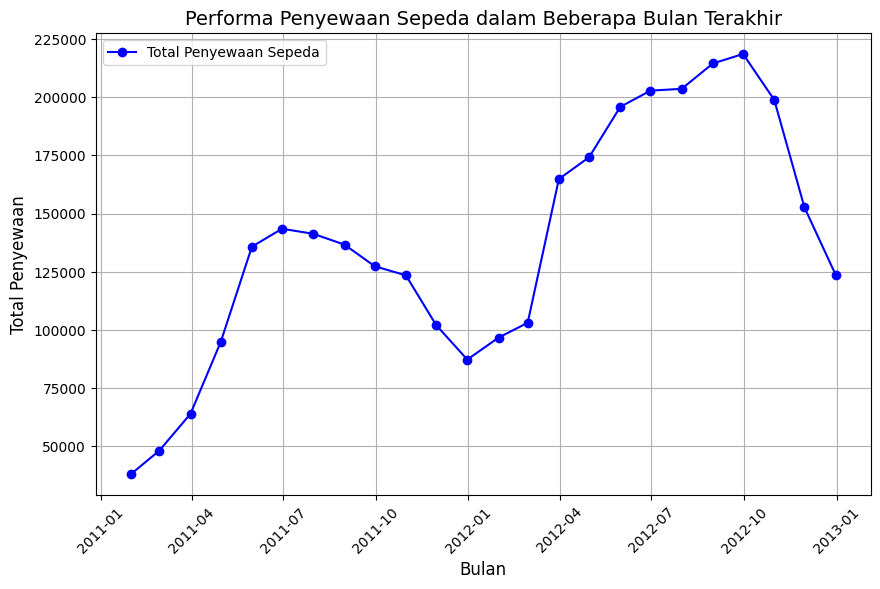

In [24]:
monthly_orders_df = day_df.resample('M', on='dteday').agg({
    'cnt': 'sum'
}).reset_index()

plt.figure(figsize=(10, 6))
plt.plot(monthly_orders_df['dteday'], monthly_orders_df['cnt'], marker='o', color='b', linestyle='-', label='Total Penyewaan Sepeda')

plt.title('Performa Penyewaan Sepeda dalam Beberapa Bulan Terakhir', fontsize=14)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Total Penyewaan', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)

plt.legend()

plt.show()

Dari grafik kita lihat bahwa terjadi penurunan pada bulan 1 tahun 2012 dan bulan 12 tahun 2012. Namun grafik tersebut masih menunjukkan peningkatan yang signifikan

### Pertanyaan 2:
**Kapan waktu penyewaan sepeda paling tinggi terjadi?**

<ipython-input-25-38cf8e0bc13d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hr', y='cnt', data=rentals_by_hour, palette='Blues')


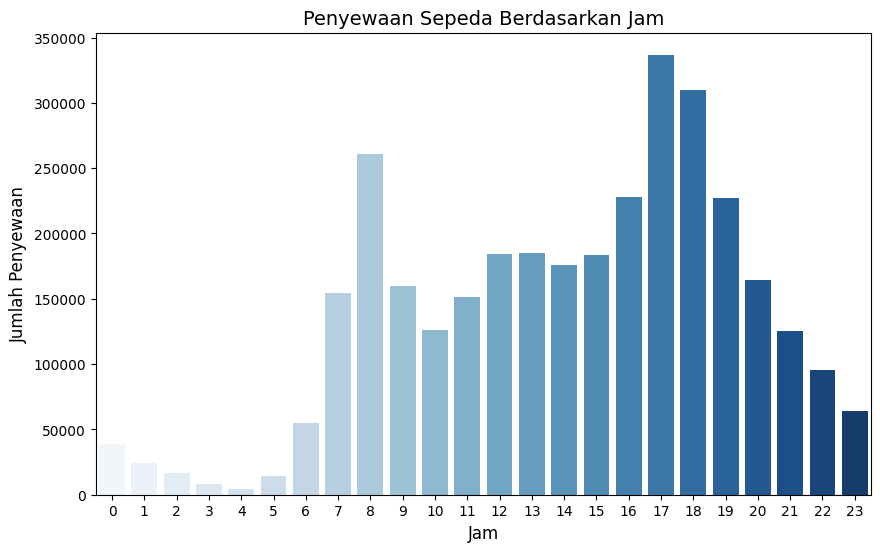

In [25]:
rentals_by_hour = hour_df.groupby('hr')['cnt'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='hr', y='cnt', data=rentals_by_hour, palette='Blues')

plt.title('Penyewaan Sepeda Berdasarkan Jam', fontsize=14)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Jumlah Penyewaan', fontsize=12)

plt.show()


Dari grafik tersebut, menunjukkan bahwa pengguna meningkat pada jam 17.00, yang mana jam tersebut biasanya jam pulang kantor ataupun sekolah

# Pertanyaan 3:
**Pada musim apa penyewaan sepeda paling tinggi?**

<ipython-input-26-28898b606d34>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='total_rentals', data=season_rental_total, palette='Blues')


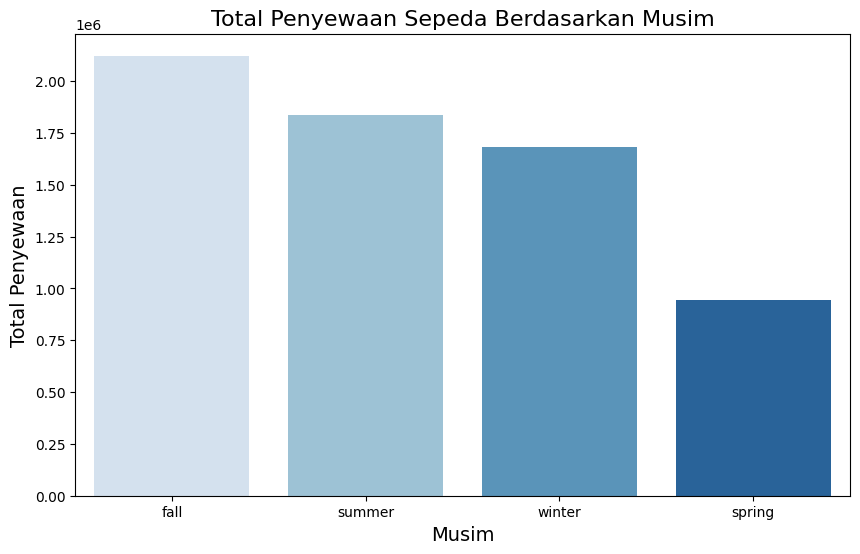

In [26]:
plt.figure(figsize=(10, 6))

sns.barplot(x='season', y='total_rentals', data=season_rental_total, palette='Blues')

plt.title('Total Penyewaan Sepeda Berdasarkan Musim', fontsize=16)
plt.xlabel('Musim', fontsize=14)
plt.ylabel('Total Penyewaan', fontsize=14)

plt.show()


Dari grafik terlihat bahwa penyewa lebih banyak pada musim gugur, yang mana musim gugur memiliki cuaca yang cerah.

## Analisis Lanjutan (Opsional)

*   **Kapan terakhir kali pengguna menyewa sepeda?**
*   **Seberapa sering pengguna menyewa sepeda dalam satu hari?**
*   **Berapa banyak total penyewaan sepeda yang dilakukan dalam satu hari?**


Untuk menjawab tiga pertanyaan analisis terakhir, kita bisa menggunakan teknik analisis lanjutan yang bernama RFM analysis

Analisis RFM (Recency, Frequency, Monetary) adalah teknik segmentasi pelanggan yang membantu dalam memahami perilaku pelanggan berdasarkan tiga faktor penting:

Recency (R) - Seberapa baru pelanggan melakukan transaksi atau aktivitas.

Frequency (F) - Seberapa sering pelanggan melakukan transaksi atau aktivitas dalam jangka waktu tertentu.

Monetary (M) - Total nilai transaksi yang dihasilkan oleh pelanggan.



Pada data kita, Metrik Recency di sini mengukur waktu sejak aktivitas terakhir dilakukan oleh pengguna. Metrik Frequency diadaptasi sebagai jumlah interaksi atau aktivitas yang dilakukan oleh pengguna selama periode waktu tertentu yang tercatat dalam dataset. Dan, Metrik Monetary diadaptasi menjadi nilai kontribusi pengguna terhadap platform berdasarkan tingkat aktivitas mereka. Dalam dataset, kita bisa menggunakan variabel seperti total jumlah aktivitas atau intensitas penggunaan sebagai proxy untuk Monetary.

In [27]:
analysis_date = day_df['dteday'].max()

day_df['Recency'] = (analysis_date - day_df['dteday']).dt.days

day_df['Frequency'] = 1

day_df['Monetary'] = day_df['cnt']

rfm_df = day_df.groupby('dteday').agg({
    'Recency': 'min',
    'Frequency': 'sum',
    'Monetary': 'sum'
}).reset_index()

rfm_df['R_rank'] = pd.qcut(rfm_df['Recency'], 4, labels=False)

rfm_df['F_rank'] = 1

if rfm_df['Monetary'].nunique() > 1:
    rfm_df['M_rank'] = pd.qcut(rfm_df['Monetary'], 4, labels=False)
else:
    rfm_df['M_rank'] = 1

rfm_df['RFM_Score'] = rfm_df['R_rank'].astype(str) + rfm_df['F_rank'].astype(str) + rfm_df['M_rank'].astype(str)

print(rfm_df[['dteday', 'Recency', 'Frequency', 'Monetary', 'RFM_Score']].head())

      dteday  Recency  Frequency  Monetary RFM_Score
0 2011-01-01      730          1       985       310
1 2011-01-02      729          1       801       310
2 2011-01-03      728          1      1349       310
3 2011-01-04      727          1      1562       310
4 2011-01-05      726          1      1600       310


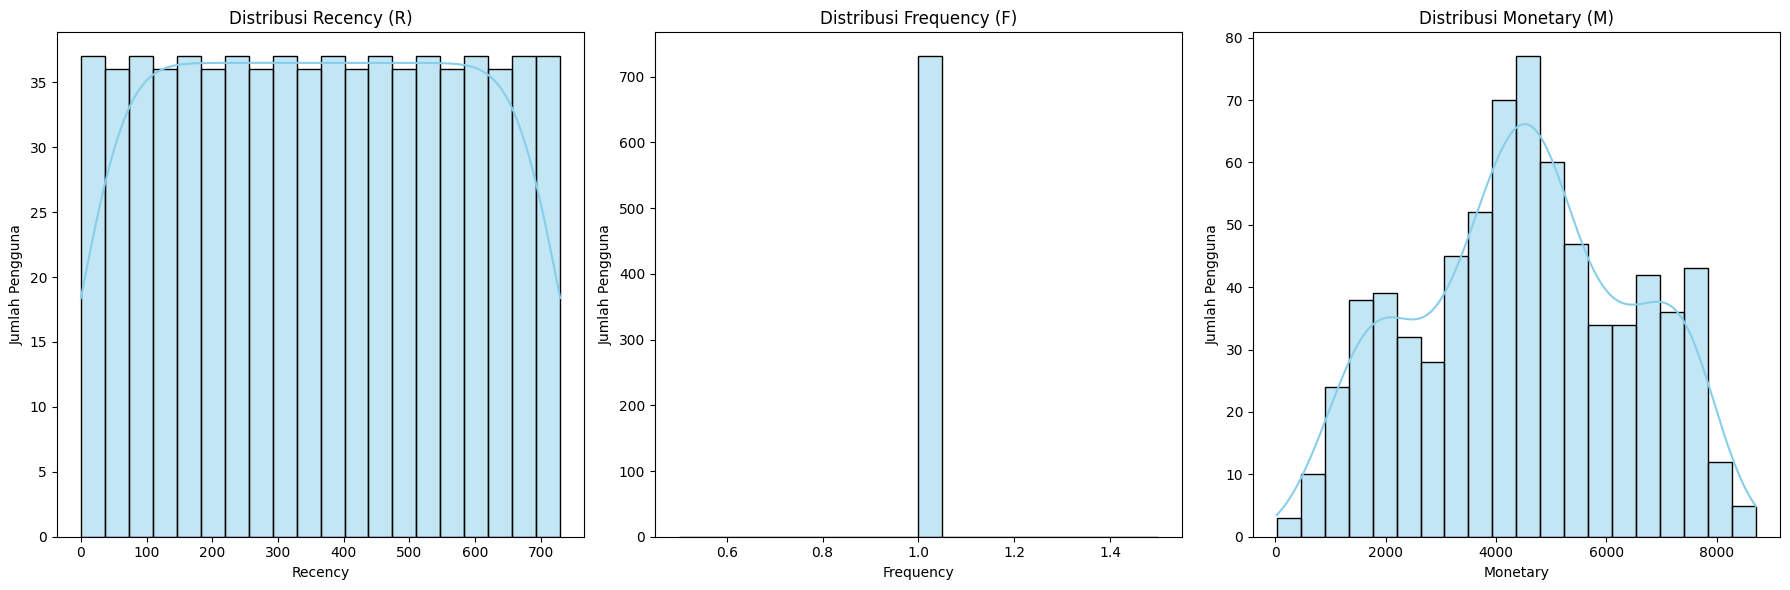

In [28]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

sns.histplot(rfm_df['Recency'], bins=20, kde=True, ax=ax[0], color='skyblue')
ax[0].set_title('Distribusi Recency (R)')
ax[0].set_xlabel('Recency')
ax[0].set_ylabel('Jumlah Pengguna')

sns.histplot(rfm_df['Frequency'], bins=20, kde=True, ax=ax[1], color='skyblue')
ax[1].set_title('Distribusi Frequency (F)')
ax[1].set_xlabel('Frequency')
ax[1].set_ylabel('Jumlah Pengguna')

sns.histplot(rfm_df['Monetary'], bins=20, kde=True, ax=ax[2], color='skyblue')
ax[2].set_title('Distribusi Monetary (M)')
ax[2].set_xlabel('Monetary')
ax[2].set_ylabel('Jumlah Pengguna')

plt.tight_layout()
plt.show()


## Conclusion

*   **Conclution pertanyaan 1**

*Bagaimana performa penyewaan sepeda dalam beberapa bulan terakhir?*

Dari visualisasi data yang kita lihat bahwa terdapat peningkatan yang sangat signifikan dalam jumlah penyewaan sepeda dari awal 2011 hingga pertengahan 2012. Ini mengindikasikan adanya peningkatan minat masyarakat terhadap aktivitas bersepeda selama periode tersebut. Namun, ada beberapa penurunan awal tahun 2012 dan akhir tahun 2012 terdapat penurunan, yang mungkin dipengaruhi oleh factor lain seperti cuaca dan musim.

*   **Conclution pertanyaan 2**

*Kapan Waktu penyewaan sepeda paling tinggi terjadi?*

Terdapat tren yang sangat jelas di mana jumlah penyewaan sepeda mencapai puncaknya pada sore hari, sekitar pukul 17.00 hingga 19.00. Ini mengindikasikan bahwa banyak orang memilih untuk menyewa sepeda setelah jam kerja atau sekolah sebagai aktivitas rekreasi atau untuk pulang kerja. Sebaliknya, jumlah penyewaan sepeda sangat rendah pada dini hari, mulai dari tengah malam hingga menjelang pagi. Ini menunjukkan bahwa pada jam-jam tersebut, permintaan akan layanan penyewaan sepeda sangat minim.



*   **Conclution pertanyaan 3**

*Pada musim apa penyewaan sepeda paling tinggi?*

Jumlah penyewaan sepeda mencapai puncaknya pada musim gugur. Ini menunjukkan bahwa masyarakat lebih sering menyewa sepeda selama musim ini dibandingkan musim lainnya. Setelah mencapai puncak di musim gugur, jumlah penyewaan sepeda mengalami penurunan yang cukup signifikan pada musim semi. Ini mengindikasikan adanya penurunan minat masyarakat terhadap penyewaan sepeda selama musim ini. Cuaca yang cerah dan menyenangkan pada musim gugur mungkin menjadi salah satu faktor utama yang mendorong peningkatan jumlah penyewaan sepeda. Sebaliknya, cuaca yang ekstrem seperti salju atau hujan lebat pada musim dingin dapat mengurangi minat masyarakat untuk bersepeda.

*   **Conclution RFM analysis**

*- Kapan terakhir kali penyewa melakukan transaksi?*

*- Seberapa sering seorang penyewa melakukan transaksi penyewaan dalam beberapa bulan terakhir?*

*- Berapa banyak total sepeda yang disewa oleh pengguna (total rental)?*

Grafik Recency menunjukkan distribusi yang relatif merata. Ini mengindikasikan bahwa pelanggan cenderung melakukan transaksi secara cukup konsisten dalam rentang waktu tertentu. Tidak ada kelompok pelanggan yang secara signifikan lebih sering atau lebih jarang melakukan transaksi baru.

Grafik Frequency menunjukkan adanya konsentrasi yang sangat tinggi pada nilai tertentu. Ini mengindikasikan bahwa sebagian besar pelanggan melakukan transaksi dengan frekuensi yang hampir sama.

Grafik Monetary menunjukkan distribusi yang mendekati normal. Ini mengindikasikan bahwa sebagian besar pelanggan melakukan transaksi dengan nilai yang relatif sama, dengan sedikit pelanggan yang melakukan transaksi dengan nilai yang sangat tinggi atau sangat rendah.



In [29]:
daily_rentals_hour.to_csv("all_data.csv", index=False)